SLR - simple linear regression

this is SLR because in the dataset there is one independent (weight) and one dependent feature(height).

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
df= pd.read_csv('./Datasets/height_weight.csv')

In [142]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [143]:
df.drop('Index',inplace=True,axis=1)

In [144]:
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

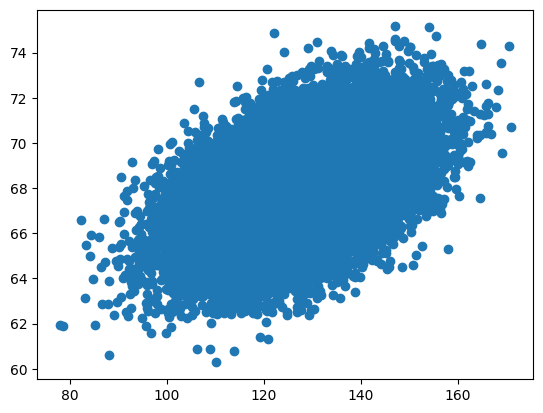

In [145]:
## scatter plot 

plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])

In [146]:
# correlation
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


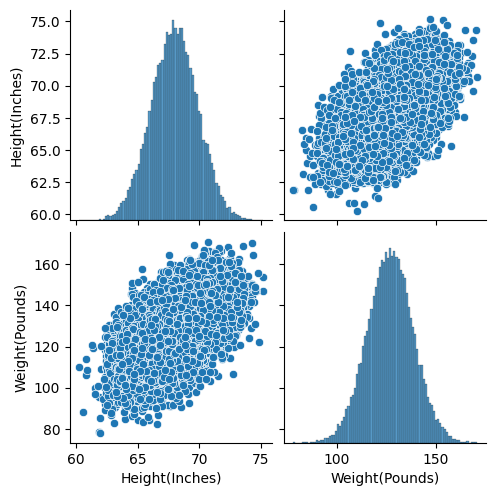

In [147]:
import seaborn as sns

sns.pairplot(df)

In [148]:
## independent and dependent features

X = df[['Height(Inches)']]    ### important step
type(X)

'''
we have given two sqaure brackets because 
independent feature must be 
in dataframe or 2 dimentional array
'''

'\nwe have given two sqaure brackets because \nindependent feature must be \nin dataframe or 2 dimentional array\n'

In [149]:
print(X.shape)
X.head()

(25000, 1)


,Height(Inches)
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781


In [150]:
Y = df['Weight(Pounds)']
Y.shape

(25000,)

In [151]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [152]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=2)

In [153]:
print(X_train.shape,X_test.shape)  # two dimension
print(Y_train.shape,Y_test.shape)  # one dimension

(18750, 1) (6250, 1)
(18750,) (6250,)


In [154]:
## Standardization  ( normalization )

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [155]:
X_train = scaler.fit_transform(X_train)  # fit and transform the input features, not the output

training -> fit_transform

testing -> tranfrom

In [156]:
X_test = scaler.transform(X_test)

In [157]:
X_test

array([[ 0.31708444],
       [-2.2971234 ],
       [ 0.66963258],
       ...,
       [ 1.37231211],
       [ 1.83072178],
       [-0.51156619]], shape=(6250, 1))

In [158]:
## Applying simple linear regression 

from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)  # initialize the object

'''
n_jobs is a parameter used to specify the number of jobs (or CPU cores) to use for computation. 
Essentially, it enables parallel processing to speed up training on large datasets.

Here’s what the values mean:
n_jobs=1: Only one core is used (no parallelization).
n_jobs=-1: All available CPU cores are used for parallel computation, maximizing speed.
'''

'\nn_jobs is a parameter used to specify the number of jobs (or CPU cores) to use for computation. \nEssentially, it enables parallel processing to speed up training on large datasets.\n\nHere’s what the values mean:\nn_jobs=1: Only one core is used (no parallelization).\nn_jobs=-1: All available CPU cores are used for parallel computation, maximizing speed.\n'

In [159]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [160]:
regression.coef_  # slope

array([5.85511488])

In [161]:
## One unit movement in the weight value  (X axis), causes 5.85 movement in height ( Y axis)

In [162]:
regression.intercept_  # intercept

np.float64(127.09227153759993)

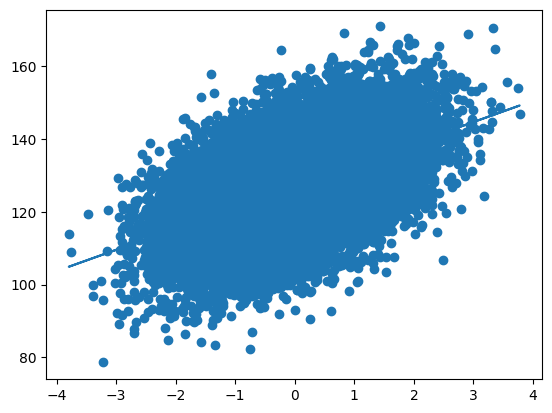

In [163]:
## plotting best fit line for training data

plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [164]:
## Prediction for test data

Y_pred = regression.predict(X_test)

In [165]:
## Performance metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [166]:
mse= mean_squared_error(Y_test,Y_pred)  # high due to outliers
mae = mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

103.6165433929133
8.10797450882054
10.179221158463614


In [167]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred)

print(score)

0.2507686921105077


In [168]:
## OLS LINEAR REGRESSION 

import statsmodels.api as sm

In [169]:
model = sm.OLS(Y_train,X_train).fit()

In [170]:
prediction = model.predict(X_test)
prediction

array([  1.85656585, -13.44992139,   3.92077567, ...,   8.03504506,
        10.71908631,  -2.99527884], shape=(6250,))

In [171]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Weight(Pounds)   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              39.55
Date:                Wed, 19 Mar 2025   Prob (F-statistic):                    3.27e-10
Time:                        22:28:48   Log-Likelihood:                     -1.1751e+05
No. Observations:               18750   AIC:                                  2.350e+05
Df Residuals:                   18749   BIC:                                  2.350e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [172]:
## Prediction for new data

regression.predict([[180]])

## the value is very high because it is not standardized

array([1181.01294977])

In [173]:
regression.predict(scaler.transform([[65]]))

c:\aditya\ML\CODE\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([117.83413708])